### Tuning Observation

#### Load Dataset

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
# Load Dataset
path = './source/l1.csv'
data = pd.read_csv(path)

# Displaying the first few rows of the dataset to understand its structure
data.head()

,Time,ARIMA,SARIMA,ETS,GP,RNN,LSTM,CNN,GRU,TCN,Actual,Raw
0,2023-09-08 02:39:20,1394.939251,1378.869848,1194.271412,15.491535,1413.6123,1427.1624,1377.9656,1244.6625,1708.1761,1384.415517,981.0
1,2023-09-08 02:39:25,1219.355187,1189.060573,680.619700,15.491517,1438.7982,1406.2715,1504.7778,1166.7898,1363.0002,1227.132570,1350.0
2,2023-09-08 02:39:30,1091.240441,1086.930382,134.046686,15.491500,1493.4492,1549.3011,1550.8635,1284.8070,1514.8164,1201.516144,686.0
3,2023-09-08 02:39:35,997.761638,1035.008481,-295.111962,15.491482,1625.0665,1881.1975,1730.2698,1570.0386,1597.2341,1246.633014,1500.0
4,2023-09-08 02:39:40,929.554918,958.118765,-624.887677,15.491465,1721.5109,1766.3683,1684.5380,1682.4996,1649.5099,1264.305722,1960.0


#### Find Pearson Correlation

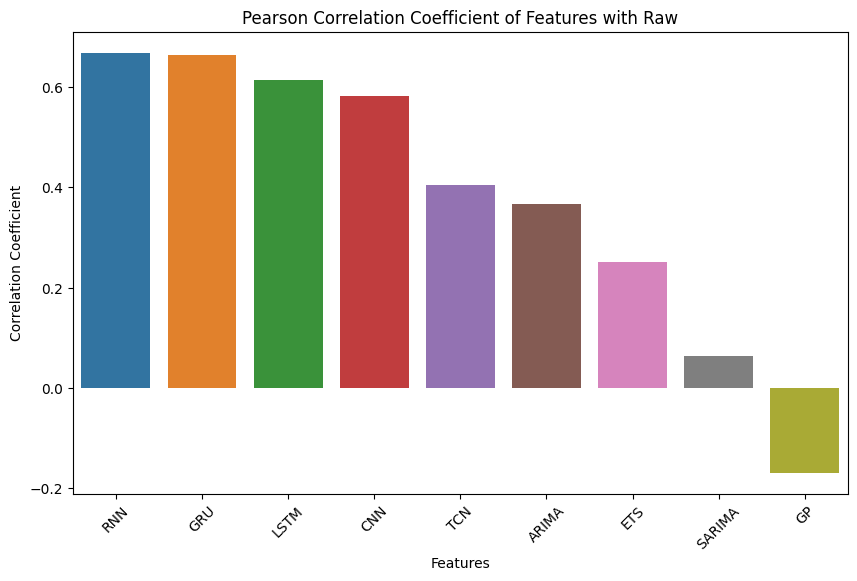

,Correlation with Raw
RNN,0.668466
GRU,0.664628
LSTM,0.615256
CNN,0.581636
TCN,0.405142
ARIMA,0.367226
ETS,0.251379
SARIMA,0.063147
GP,-0.169775


In [13]:
# Calculating Pearson correlation coefficient between each feature and the 'Actual' column
features = ['ARIMA', 'SARIMA', 'ETS', 'GP', 'RNN', 'LSTM', 'CNN', 'GRU', 'TCN']
correlation_target = 'Raw'
prediction_target = 'Raw'
rmse_target = 'Raw'
correlations = {feature: pearsonr(data[feature], data[correlation_target])[0] for feature in features}

# Sorting the features based on their correlation in descending order
sorted_features = sorted(correlations, key=correlations.get, reverse=True)

# Displaying the correlation coefficients
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=[f'Correlation with {correlation_target}'])
correlation_df_sorted = correlation_df.reindex(sorted_features)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_df_sorted.index, y=correlation_df_sorted[f'Correlation with {correlation_target}'])
plt.title(f'Pearson Correlation Coefficient of Features with {correlation_target}')
plt.xticks(rotation=45)
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()

correlation_df_sorted

In [4]:
# Recalculating Pearson correlation coefficient between each feature and the 'Actual' column
numeric_columns = features + [prediction_target]
numeric_data = data[numeric_columns]
cleaned_data = numeric_data.dropna(subset=[prediction_target])
compare_rmse_column = data[rmse_target].dropna().iloc[1000:]

# Preparing the training and testing datasets
train_data = cleaned_data.iloc[:1000]
test_data = cleaned_data.iloc[1000:]

#### Linear Regression

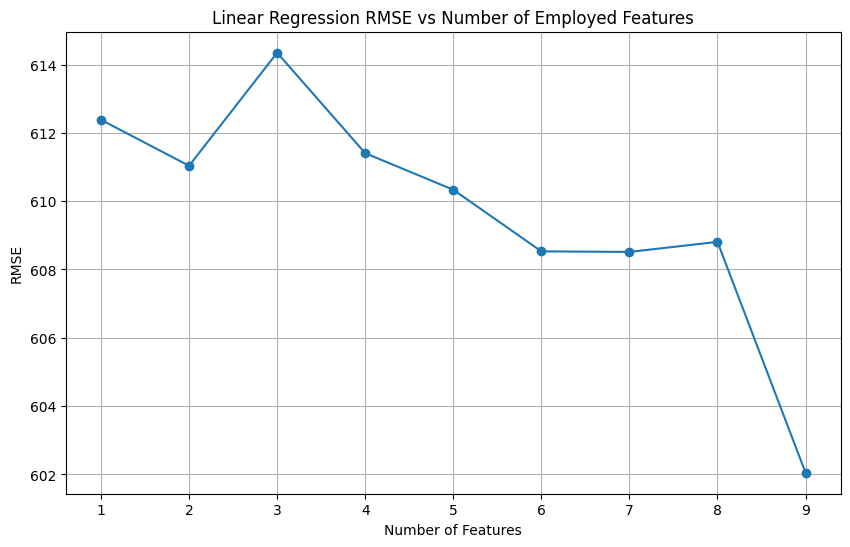

[612.3814388603299,
 611.0357545156902,
 614.3453966630451,
 611.4043476119015,
 610.3348194160608,
 608.5311376987238,
 608.5136793502742,
 608.8082622608858,
 602.050941151779]

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# List to store RMSE values for each iteration
rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the model
    model = LinearRegression()
    model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the model
    predictions = model.predict(test_data[selected_features])
    rmse = mean_squared_error(compare_rmse_column, predictions, squared=False)
    rmse_values.append(rmse)

# Plotting the graph of RMSE vs number of employed features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rmse_values, marker='o')
plt.title('Linear Regression RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values
rmse_values

#### Random Forest

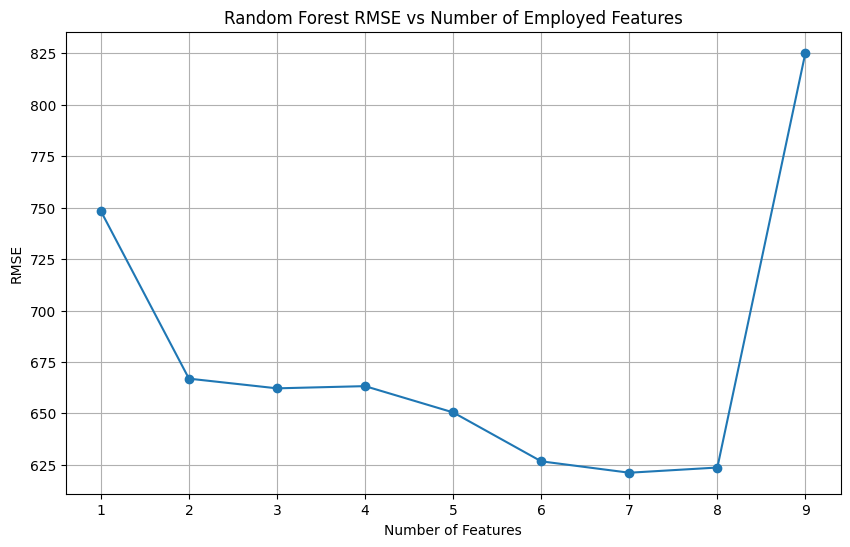

[748.3118400116357,
 666.8766059399595,
 662.1639679804391,
 663.2368952164829,
 650.4572860755732,
 626.6847749795746,
 621.145481526832,
 623.6664566432926,
 825.3122578350573]

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Random Forest
rf_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]

    # Training the Random Forest model
    rf_model = RandomForestRegressor()
    rf_model.fit(train_data[selected_features], train_data[prediction_target])

    # Testing the Random Forest model
    rf_predictions = rf_model.predict(test_data[selected_features])
    rf_rmse = mean_squared_error(compare_rmse_column, rf_predictions, squared=False)
    rf_rmse_values.append(rf_rmse)

# Plotting the graph of RMSE vs number of employed features for Random Forest
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), rf_rmse_values, marker='o')
plt.title('Random Forest RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Random Forest
rf_rmse_values

#### Feed Forward Neural Network

8/8 [==============================] - 0s 1ms/step


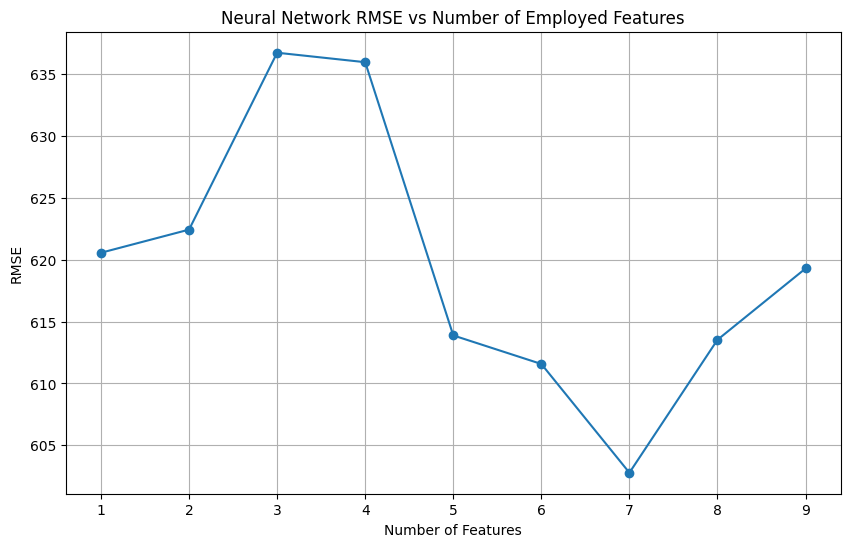

[620.5601599855878,
 622.4304026314916,
 636.7202179683834,
 635.954683126363,
 613.8810444758716,
 611.5736476634031,
 602.7892715684626,
 613.5291797240714,
 619.2882130907044]

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming cleaned_data, train_data, test_data are already prepared
# and sorted_features contains the features sorted by their correlation

# List to store RMSE values for each iteration using Neural Network
nn_rmse_values = []

# Looping through the features based on their sorted correlation
for i in range(1, len(sorted_features) + 1):
    # Selecting the top i features
    selected_features = sorted_features[:i]
    X_train = train_data[selected_features].values
    X_test = test_data[selected_features].values
    y_train = train_data[prediction_target].values
    y_test = test_data[prediction_target].values

    # Define the Neural Network model architecture
    model = Sequential([
        Dense(10, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(10, activation="relu"),
        Dense(1)
    ])

    # Compile the model
    model.compile(optimizer="adam", loss="mse")

    # Train the model
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

    # Predict using the model
    nn_predictions = model.predict(X_test).flatten()

    # Calculate RMSE
    nn_rmse = mean_squared_error(compare_rmse_column, nn_predictions, squared=False)
    nn_rmse_values.append(nn_rmse)

# Plotting the graph of RMSE vs number of employed features for Neural Network
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_features) + 1), nn_rmse_values, marker='o')
plt.title('Neural Network RMSE vs Number of Employed Features')
plt.xlabel('Number of Features')
plt.ylabel('RMSE')
plt.xticks(range(1, len(sorted_features) + 1))
plt.grid(True)
plt.show()

# Displaying RMSE values for Neural Network
nn_rmse_values